# U(1) quenched

### Be sure to initialize!

In [1]:
import numpy
var('β', 'θ')

(β, θ)

In [2]:
def readCollectedData2(outFileName):
    f = open(outFileName, "r")
    list = []
    for line in f:
        if line[0] == " ":
            data = line.split()
            list.append([float(data[0]), float(data[1])])
    f.close()
    return list

In [3]:
def readCollectedData3(outFileName):
    f = open(outFileName, "r")
    list = []
    for line in f:
        if line[0] == " ":
            data = line.split()
            list.append([float(data[0]), float(data[1]), float(data[2])])
    f.close()
    return list

In [4]:
def invertBeta2(list):
    return [[1 / a[0], a[1]] for a in list]

In [5]:
def invertBeta3(list):
    return [[1 / a[0], a[1], a[2]] for a in list]

In [6]:
def writeList(list, fileName):
    f = open(fileName, "w")
    for a in list:
        s = ""
        for b in a:
            s += str(b) + " "
        f.write(s[:len(s) - 1] + "\n")
    f.close()
    return

### Bessel functions

- `bessel_I(0, b)` is defined as

> $I_0(\beta) \equiv \frac{1}{2 \pi} \int_{-\pi}^{\pi} d\theta \, e^{\beta \cos(\theta)}$

- check by numerical integration

In [7]:
I0b = [[b, numerical_integral(exp(b * cos(θ)), -pi, pi)[0]  / (2 * pi)]
       for b in numpy.arange(0, 2.1, 0.1)]

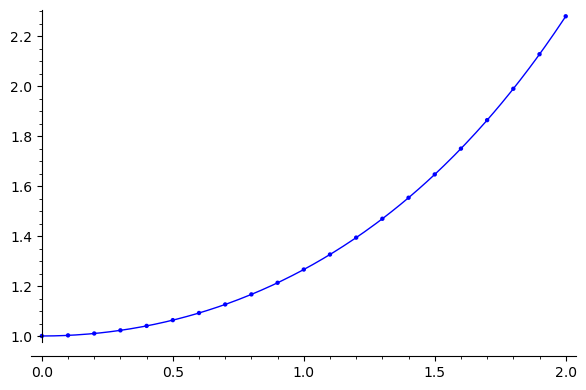

In [8]:
list_plot(I0b) + plot(bessel_I(0, x), 0, 2)

***
- `bessel_I(1, b)` is defined by

> $I_1(\beta) \equiv \frac{1}{2 \pi} \int_{-\pi}^{\pi} d\theta \, \cos(\theta) \, e^{\beta \cos(\theta)}$

- check by numerical integration

In [9]:
I1b = [[b, numerical_integral(cos(θ) * exp(b * cos(θ)), -pi, pi)[0] / (2 * pi)]
       for b in numpy.arange(0, 2.1, 0.125)]

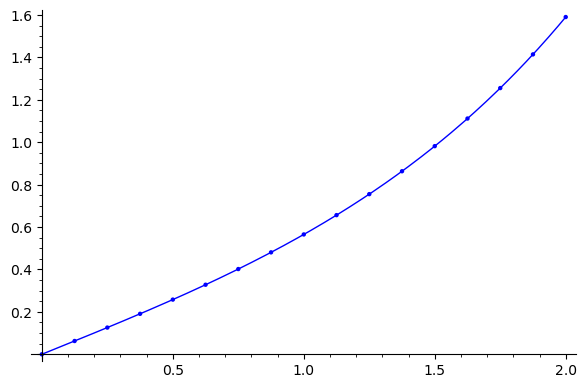

In [10]:
list_plot(I1b) + plot(bessel_I(1, x), 0, 2)

***
- comparison of two Bessel functions

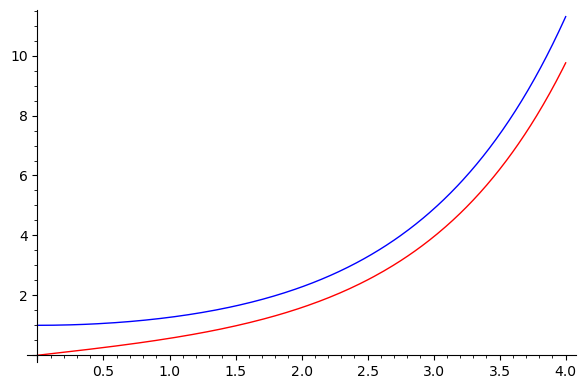

In [11]:
plot(bessel_I(0, x), 0, 4) + plot(bessel_I(1, x), 0, 4, color = 'red')

### Gauge action

- analytical prediction for expectation value of gauge action as function of $\beta$

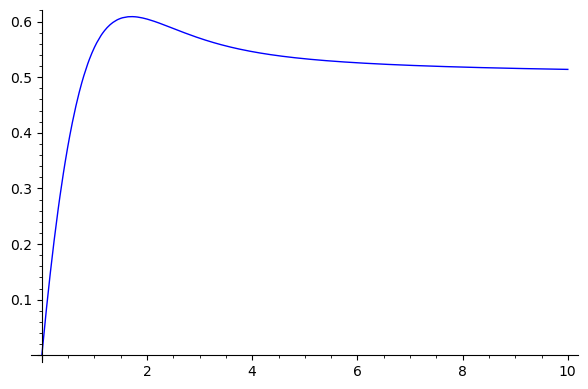

In [12]:
plot(β * (1 - bessel_I(1, β) / bessel_I(0, β)), 0, 10)

- comparision with heaetbath/Metropolis simulation on 16x16 lattice with 100000 measurements

In [13]:
sg = readCollectedData2("sgauge.col")

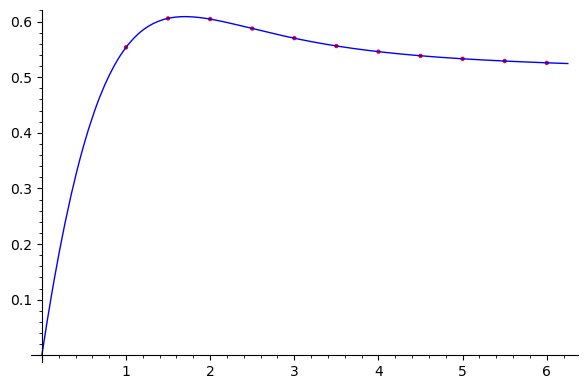

In [14]:
plot(β * (1 - bessel_I(1, β) / bessel_I(0, β)), 0, 6.25) + list_plot(sg, color = 'red')

### Quenched topological susceptibility

For topological charge defined as

> $Q_S = \frac{1}{2\pi}\sum_{P}\sin(\theta_P)$

there is prediction for quenched topological susceptibility by Bardeen et al.

> $\chi_T = \frac{I_1(\beta)}{4 \pi^2 \beta\,I_0(\beta)} \quad \Rightarrow \quad
  \chi_T\,\beta = \frac{I_1(\beta)}{4 \pi^2 I_0(\beta)}$

In [15]:
bchiTsin(β) = bessel_I(1, β) / (4.0 * pi^2 * bessel_I(0, β))

$\chi_T\,\beta$ goes with $\beta\rightarrow\infty$ asymptotically to $\frac{1}{4\pi^2}$ 

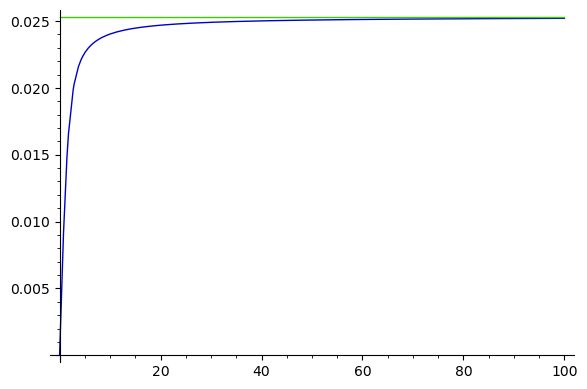

In [16]:
plot((bchiTsin, 1.0 / (4.0 * pi^2)), 0, 100)

#### Comparision with heatbath/Metropolis simulation results

- quenched topological susceptibility as function of $1/\beta$

In [17]:
b1chiTsin(beta) = bessel_I(1, 1.0 / beta) / (4.0 * pi^2 * bessel_I(0, 1.0 / beta))

In [18]:
b1chiTsinMet = invertBeta2(readCollectedData2("bchiTsin.col"))

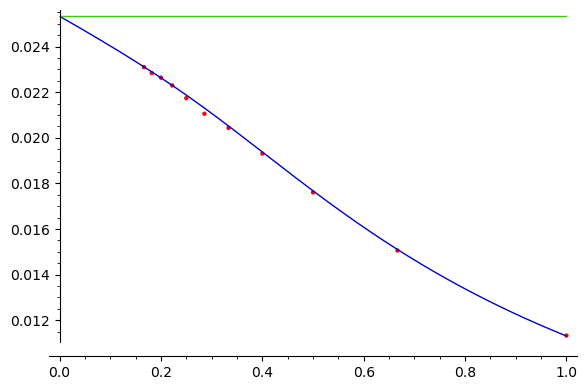

In [19]:
plot((b1chiTsin, 1.0 / (4.0 * pi^2)), 0, 1) + list_plot(b1chiTsinMet, color = 'red')

In [20]:
points = [[ib, n(bessel_I(1, RealNumber(1 / ib)) /
           (4 * pi^2 * bessel_I(0, RealNumber(1 / ib))))] for ib in numpy.arange(0.01, 1.1, 0.01)]

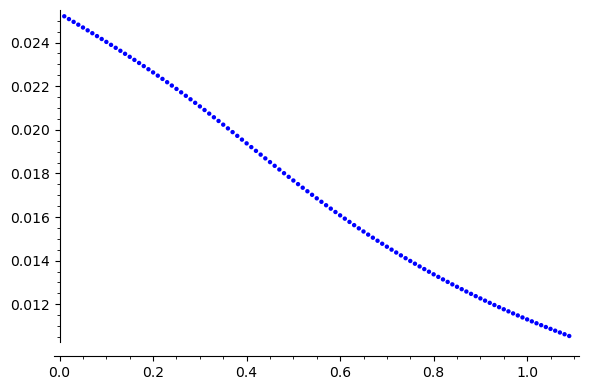

In [21]:
list_plot(points)

In [22]:
writeList(points, "b1chiTsin.lst")

For topological charge defined as

> $Q_T = \frac{1}{2\pi}\sum_{P}\theta_P$

quenched topological susceptibility can be computed numerically

In [23]:
points = [[1 / b, n(b * numerical_integral(θ^2 * exp(b * cos(θ)) / (2 * pi), -pi, pi)[0] /
          (4 * pi^2 * bessel_I(0, RealNumber(b))))] for b in numpy.arange(2.0, 100.0, 0.1)]

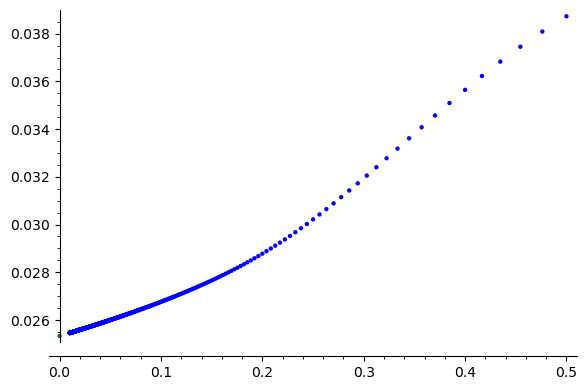

In [24]:
list_plot(points) + point((0, n(1 / (4 * pi^2))), color = 'green')

In [25]:
points = [[ib, n((1 / ib) * numerical_integral(θ^2 * exp((1 / ib) * cos(θ)) / (2 * pi), -pi, pi)[0] /
          (4 * pi^2 * bessel_I(0, RealNumber(1 / ib))))] for ib in numpy.arange(0.01, 1.1, 0.01)]

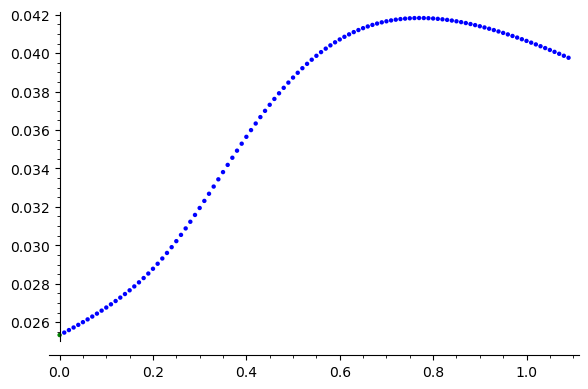

In [26]:
list_plot(points) + point((0, n(1 / (4 * pi^2))), color = 'green')

In [27]:
hmc = [[1 / 2, 0.0389], [1 / 3, 0.0335], [1 / 4, 0.0304], [1 / 5, 0.0286], [1 / 5.5, 0.0281],
       [1 / 6, 0.0279], [1 / 6.5, 0.0277], [1 / 7, 0.0279], [1 / 7.5, 0.0273], [1 / 8, 0.0274]]

In [28]:
b1chiTMet = invertBeta2(readCollectedData2("bchiT.col"))

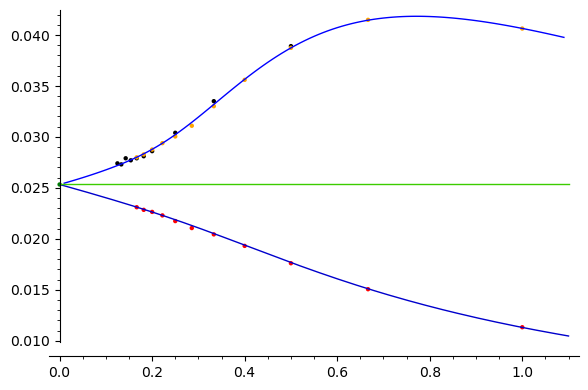

In [29]:
list_plot(points, plotjoined = True) + point((0, n(1 / (4 * pi^2))),
  color = 'green') + list_plot(hmc, color = 'black') + plot((b1chiTsin, 1.0 / (4.0 * pi^2)),
  0, 1.1) + list_plot(b1chiTsinMet, color = 'red') + list_plot(b1chiTMet, color = 'orange')

In [30]:
writeList(points, "b1chiT.lst")

In [31]:
writeList(invertBeta3(readCollectedData3("bchiT.col")), "b1chiT.col")

In [32]:
writeList(invertBeta3(readCollectedData3("bchiTsin.col")), "b1chiTsin.col")